In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


**Data Description**

In [9]:
sentiment_d = pd.read_csv('liwcdepression.csv')
sentiment_d.head(2)

,A,B,C,D,E,F,G,H,I,WC,...,risk,focuspast,focuspresent,focusfuture,informal,swear,netspeak,assent,nonflu,filler
0,0,1.390000e+18,53,"Barcelona, Spain","For 34 years, Psych Congress has served as a u...",10/27/2021 11:45,Extended abstract submission deadline is TODAY...,NaN,2.0,47,...,0.00,2.13,10.64,0.0,4.26,0.0,4.26,0.0,0.0,0.0
1,1,2.350451e+09,30626,"Sacramento, California",Believer in creating a healthy game plan to fe...,10/27/2021 11:39,"🌟This Fall and if you can, intentionally spend...",['anxiety'],2.0,43,...,2.33,0.00,6.98,0.0,4.65,0.0,4.65,0.0,0.0,0.0


In [3]:
sentiment_d.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'WC', 'Analytic', 'Clout',
       'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic', 'affect', 'posemo',
       'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend', 'female',
       'male', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certain',
       'differ', 'drives', 'affiliation', 'achieve', 'power', 'reward', 'risk',
       'focuspast', 'focuspresent', 'focusfuture', 'informal', 'swear',
       'netspeak', 'assent', 'nonflu', 'filler'],
      dtype='object')

In [15]:
posemo_d = sentiment_d['posemo']
negemo_d = sentiment_d['negemo']
tone_d = sentiment_d['Tone']
risk_d = sentiment_d['risk']
anger_d = sentiment_d['anger']
anx_d = sentiment_d['anx']
social_d = sentiment_d['social']

print('Positive Mood Average', np.mean(posemo_d))
print('Negative Mood Average',np.mean(negemo_d))
print('Tone Average',np.mean(tone_d))
print('Risk Words Average',np.mean(risk_d))
print('Anger Words Average',np.mean(anger_d))
print('Anxious Words Average',np.mean(anx_d))
print('Social Words Average',np.mean(social_d))

Positive Mood Average 1.4611253212215716
Negative Mood Average 8.804785752705042
Tone Average 13.93900794836531
Risk Words Average 0.5970089045598372
Anger Words Average 0.1596312675551309
Anxious Words Average 2.219996414270925
Social Words Average 2.8010004183348243


In [10]:
sentiment_a = pd.read_csv('liwcadhd.csv')
sentiment_a.head(2)

,A,B,C,D,E,F,G,H,WC,Analytic,...,risk,focuspast,focuspresent,focusfuture,informal,swear,netspeak,assent,nonflu,filler
0,0,1365319367676878849,52,"Sheffield, England","❤Sal / UK\r\r\n🧡Player of games, Master of non...",2021-10-27 12:40:38,Saw GP today and we went through stuff and I t...,NaN,47,81.28,...,0.0,4.26,10.64,0.0,0.00,0.0,0.00,0.0,0.0,0.0
1,1,53638786,1667,UK,27y/o nonbinary creator. They/Them. disabled. ...,2021-10-27 12:40:00,My ADHD Graveyard | Officially Diagnosed and A...,NaN,33,73.59,...,0.0,0.00,3.03,0.0,6.06,0.0,6.06,0.0,0.0,0.0


In [16]:
posemo_a = sentiment_a['posemo']
negemo_a = sentiment_a['negemo']
tone_a = sentiment_a['Tone']
risk_a = sentiment_a['risk']
anger_a = sentiment_a['anger']
anx_a = sentiment_a['anx']
social_a = sentiment_a['social']

print('Positive Mood Average', np.mean(posemo_a))
print('Negative Mood Average',np.mean(negemo_a))
print('Tone Average',np.mean(tone_a))
print('Risk Words Average',np.mean(risk_a))
print('Anger Words Average',np.mean(anger_a))
print('Anxious Words Average',np.mean(anx_a))
print('Social Words Average',np.mean(social_a))

Positive Mood Average 1.5461720051842187
Negative Mood Average 0.8152036659877753
Tone Average 40.86207276431081
Risk Words Average 0.13222181077578232
Anger Words Average 0.12365210146269179
Anxious Words Average 0.19719496389557523
Social Words Average 9.381833919643295


In [11]:
sentiment_o = pd.read_csv('liwcocd.csv')
sentiment_o.head(2)

,Source (A),Source (B),Source (C),Source (D),Source (E),Source (F),Source (G),Source (H),WC,Analytic,...,risk,focuspast,focuspresent,focusfuture,informal,swear,netspeak,assent,nonflu,filler
0,0,829318199468490752,294,Eora Nation,PhD candidate in gender and cultural studies @...,2021-10-27 11:59:28,New research out finds that #acupuncture reduc...,NaN,45,46.37,...,0.0,4.44,6.67,0.0,4.44,0.0,4.44,0.0,0.0,0.0
1,1,415086641,432,London,Children’s Book Illustrator 🎨 & former @pathwa...,2021-10-27 11:51:28,New research out finds that #acupuncture reduc...,['ocd'],45,46.37,...,0.0,4.44,6.67,0.0,4.44,0.0,4.44,0.0,0.0,0.0


In [49]:
posemo_o = sentiment_o['posemo']
negemo_o = sentiment_o['negemo']
tone_o = sentiment_o['Tone']
risk_o = sentiment_o['risk']
anger_o = sentiment_o['anger']
anx_o = sentiment_o['anx']
social_o = sentiment_o['social']

print('Positive Mood Average', np.mean(posemo_o))
print('Negative Mood Average',np.mean(negemo_o))
print('Tone Average',np.mean(tone_o))
print('Risk Words Average',np.mean(risk_o))
print('Anger Words Average',np.mean(anger_o))
print('Anxious Words Average',np.mean(anx_o))
print('Social Words Average',np.mean(social_o))

Positive Mood Average 2.6491198044009883
Negative Mood Average 3.3707998602864064
Tone Average 36.44690534404496
Risk Words Average 0.28133077191756894
Anger Words Average 0.31406566538595804
Anxious Words Average 1.7610653161019938
Social Words Average 5.430764931889652


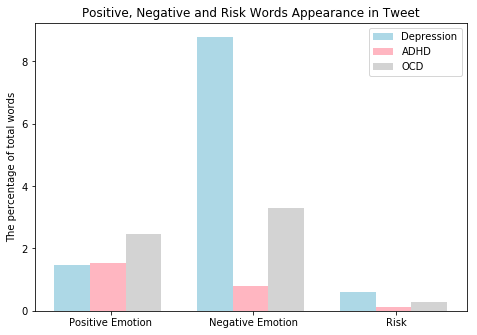

In [93]:
data = [[1.46,8.8, 0.59],
[1.54, 0.81, 0.13],
[2.64, 3.3, 0.281]]

# the x locations for the groups
width = 0.27  
X = np.arange(3)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
n = ['Positive Emotion', 'Negative Emotion', 'Risk']
ax.bar(X + 0.00, data[0], color = 'lightblue', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'lightpink', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'lightgray', width = 0.25)
ax.set_ylabel('The percentage of total words')
ax.set_xticks(X+width)
ax.set_xticklabels(['Positive Emotion', 'Negative Emotion', 'Risk'])
ax.set_title('Positive, Negative and Risk Words Appearance in Tweet')
ax.legend(labels=['Depression', 'ADHD', 'OCD'])

In [97]:
avg_wc_d = np.mean(sentiment_d['WC'])
avg_wc_a = np.mean(sentiment_a['WC'])
avg_wc_o = np.mean(sentiment_o['WC'])

In [98]:
print(avg_wc_d, avg_wc_a, avg_wc_o)

33.08402557819877 28.939270505461952 32.58330422633601


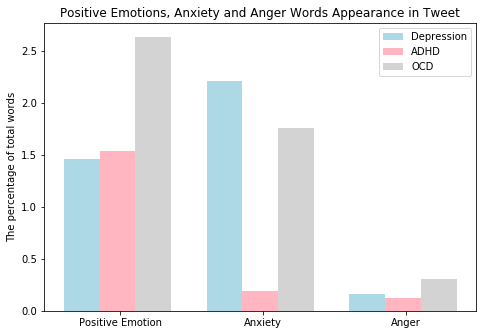

In [102]:
data = [[1.46,2.21,0.159],
[1.54, 0.19, 0.123],
[2.64, 1.76, 0.31]]

# the x locations for the groups
width = 0.27  
X = np.arange(3)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
n = ['Positive Emotion', 'Anxiety', 'Anger']
ax.bar(X + 0.00, data[0], color = 'lightblue', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'lightpink', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'lightgray', width = 0.25)
ax.set_ylabel('The percentage of total words')
ax.set_xticks(X+width)
ax.set_xticklabels(['Positive Emotion', 'Anxiety', 'Anger'])
ax.set_title('Positive Emotions, Anxiety and Anger Words Appearance in Tweet')
ax.legend(labels=['Depression', 'ADHD', 'OCD'])

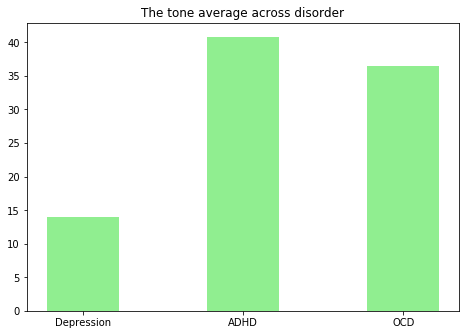

In [118]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Depression', 'ADHD', 'OCD']
students = [13.939,40.86,36.44]
ax.bar(langs,students, width=0.45, color='lightgreen')
ax.set_title('The tone average across disorder')
plt.show()